<a href="https://colab.research.google.com/github/CarlosMejia07/Proyecto-Kaggle-UdeA-20252/blob/main/01-exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.28GB/s]


In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [6]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [10]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
z = z[['F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'E_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
z.head()

,F_EDUCACIONPADRE,F_EDUCACIONMADRE,E_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Técnica o tecnológica incompleta,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica completa,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,No sabe,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo


**Estudiantes por programa académico y por departamento, ordenados por orden alfabético**

In [8]:
z1 = pd.read_csv("train.csv")

EsxProg = z1["E_PRGM_ACADEMICO"].value_counts().sort_index()
print(EsxProg)

E_PRGM_ACADEMICO
3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES       69
ACTIVIDAD FISICA Y DEPORTE                          162
ACUICULTURA                                          79
ADMINISTRACION                                      117
ADMINISTRACION  FINANCIERA                           74
                                                  ...  
TRABAJO SOCIAL                                    12686
TRADUCCION INGLES-FRANCES-ESPAÑOL                    68
TURISMO                                             222
URBANISMO                                             7
ZOOTECNIA                                          1669
Name: count, Length: 948, dtype: int64


In [9]:
EsxDep = z1["E_PRGM_DEPARTAMENTO"].value_counts().sort_index()
print(EsxDep)

E_PRGM_DEPARTAMENTO
AMAZONAS               40
ANTIOQUIA           83607
ARAUCA                589
ATLANTICO           41020
BOGOTÁ             282159
BOLIVAR             20629
BOYACA              14048
CALDAS              11640
CAQUETA              2659
CASANARE             1852
CAUCA               11471
CESAR                8279
CHOCO                4289
CORDOBA             12188
CUNDINAMARCA        14018
GUAVIARE               37
HUILA                9995
LA GUAJIRA           4778
MAGDALENA            9512
META                 7910
NARIÑO              13454
NORTE SANTANDER     22588
PUTUMAYO              795
QUINDIO              8229
RISARALDA           12679
SAN ANDRES             10
SANTANDER           28828
SUCRE                8674
TOLIMA              11921
VALLE               44588
VAUPES                 14
Name: count, dtype: int64


**Porcentaje de estudiantes por valor de matricula y por horas laboradas que obtuvieron 'x' rendimiento global**

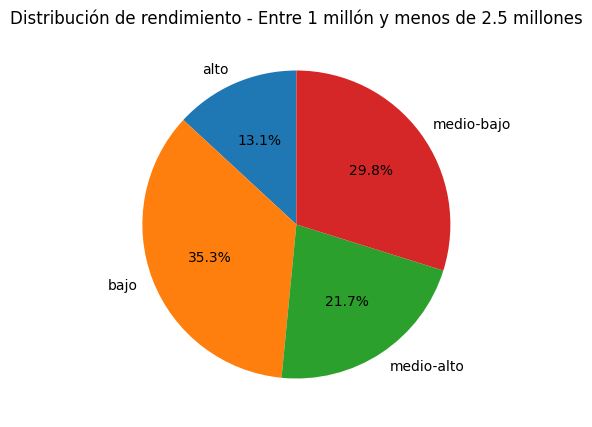

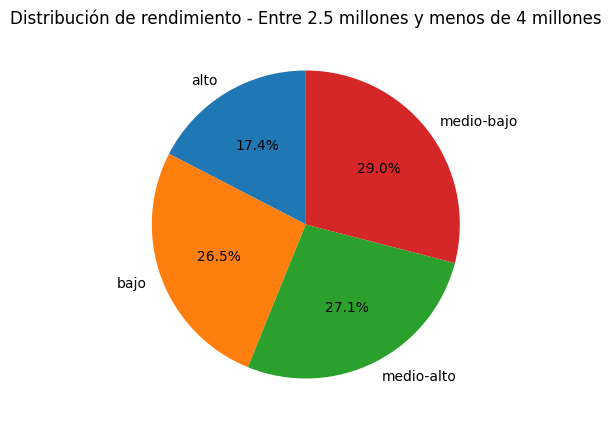

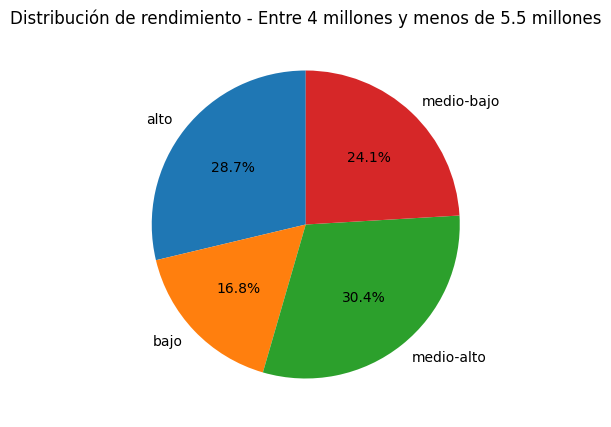

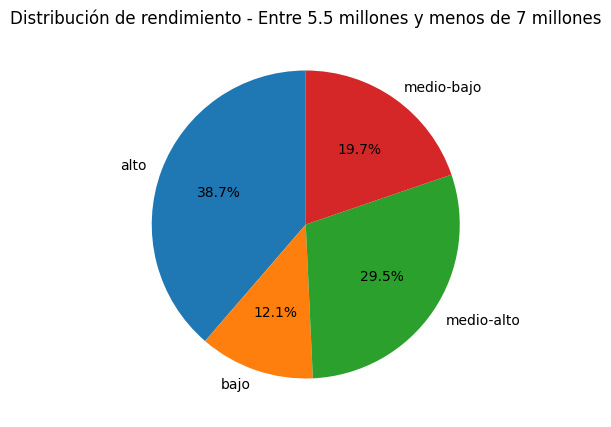

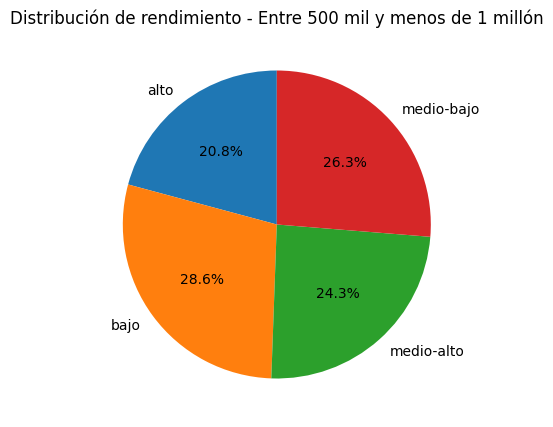

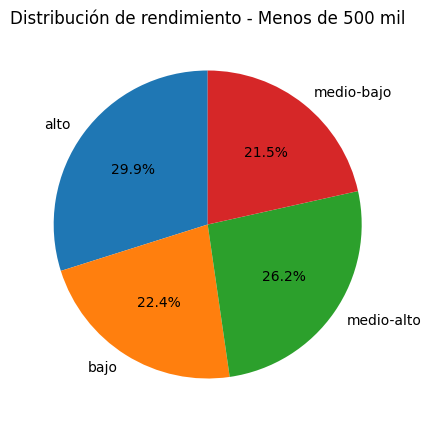

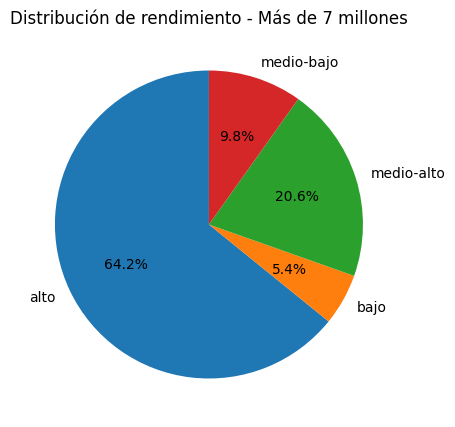

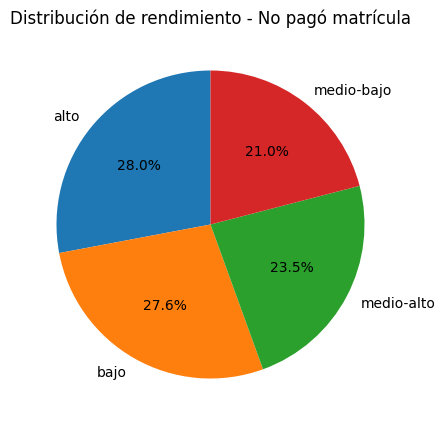

In [15]:
import matplotlib.pyplot as plt
tabla = pd.crosstab(
    z1["E_VALORMATRICULAUNIVERSIDAD"],
    z1["RENDIMIENTO_GLOBAL"],
    normalize="index"
) * 100

# --- 2. Graficar un pastel por cada valor de matrícula ---
for valor, fila in tabla.iterrows():
    plt.figure(figsize=(5,5))
    plt.pie(
        fila,
        labels=fila.index,
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(f"Distribución de rendimiento - {valor}")
    plt.show()

In [13]:
Estudio1 = (
    z1.groupby("E_HORASSEMANATRABAJA")["RENDIMIENTO_GLOBAL"]
      .value_counts(normalize=True) * 100
)

Estudio1

E_HORASSEMANATRABAJA  RENDIMIENTO_GLOBAL
0                     alto                  39.256971
                      medio-alto            24.796225
                      medio-bajo            19.679966
                      bajo                  16.266838
Entre 11 y 20 horas   bajo                  27.636656
                      medio-bajo            24.930734
                      alto                  23.782767
                      medio-alto            23.649844
Entre 21 y 30 horas   bajo                  26.412998
                      medio-bajo            26.232833
                      medio-alto            24.778570
                      alto                  22.575599
Menos de 10 horas     bajo                  29.170442
                      alto                  26.789462
                      medio-bajo            22.527554
                      medio-alto            21.512541
Más de 30 horas       medio-bajo            27.879865
                      medio-alto            26.509513
                      bajo                  25.162020
                      alto                  20.448603
Name: proportion, dtype: float64